In [1]:
import numpy as np
import zarr
import matplotlib.pyplot as plt


from dataset_util import get_agent_died_in_step

def deaths_per_step(z):

    deaths = []

    print(deaths)
    for episode in range(0, len(z.attrs.get('EpisodeSteps'))):
        
        dead_in_steps = get_agent_died_in_step(z.attrs.get('EpisodeActions')[episode],
                                z.attrs.get('EpisodeDead')[episode]
        )
        deaths = np.append(deaths, dead_in_steps)
        # print("Episode: {}".format(episode))
        # print(dead_in_steps)


    print(deaths)

    plt.plot(deaths)

/opt/miniconda3/envs/pommer/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Import error GL! You will not be able to render --> Library "GL" not found.


In [2]:
 z = zarr.open('/PommerLearn/1M_simple_0.zr', 'r')
 

In [3]:
 deaths = []


In [4]:
for episode in range(0, len(z.attrs.get('EpisodeSteps'))):
        
        dead_in_steps = get_agent_died_in_step(z.attrs.get('EpisodeActions')[episode],
                                z.attrs.get('EpisodeDead')[episode]
        )
        deaths = np.append(deaths, dead_in_steps)
        # print("Episode: {}".format(episode))
        # print(dead_in_steps)


In [5]:
    print(deaths)




[22.  0.  0. ... 63. 90.  0.]


In [7]:
import pandas as pd


In [8]:
df = pd.DataFrame(data=deaths)

In [10]:
df2 = pd.DataFrame({
    "deaths": df[0].value_counts()
})

In [12]:
print(df2)


       deaths
0.0      1725
12.0      219
22.0      161
23.0      136
24.0       91
...       ...
337.0       1
541.0       1
336.0       1
272.0       1
545.0       1

[446 rows x 1 columns]


In [18]:
df2.drop([0])

,deaths
12.0,219
22.0,161
23.0,136
24.0,91
13.0,77
...,...
337.0,1
541.0,1
336.0,1
272.0,1


<AxesSubplot:ylabel='Frequency'>

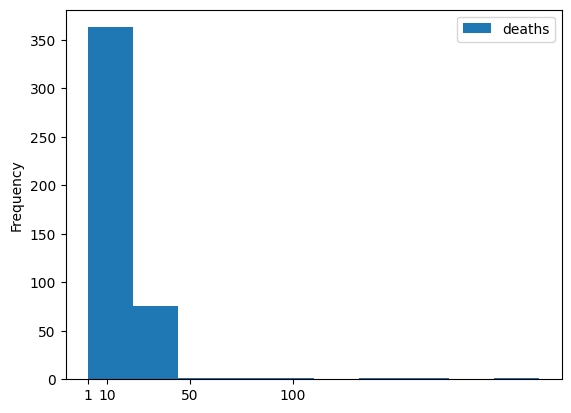

In [20]:
df2.drop([0]).plot(kind='hist', xticks=[1,10, 50, 100])

In [22]:
custom_bins = range(0,550,10)

<AxesSubplot:ylabel='Frequency'>

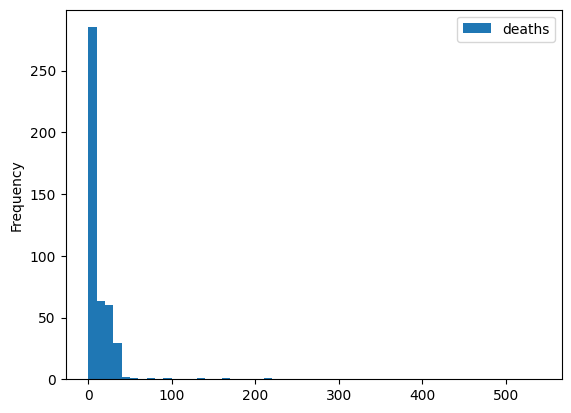

In [24]:
df2.drop([0]).plot(kind='hist', bins=custom_bins)

In [27]:
from dataset_util import get_agent_episode_slice

episode_slice = get_agent_episode_slice(z,1)

obs = z['obs'][episode_slice]

In [30]:
obs.shape

(800, 23, 11, 11)

In [32]:
np.count_nonzero(obs[:,1,:,:])

8910

In [39]:
np.sum(obs[1,1,:,:], axis=0)

array([4., 5., 2., 2., 4., 4., 4., 3., 1., 3., 4.], dtype=float32)

In [40]:
np.sum(obs[1,1,:,:], axis=1)

array([2., 4., 1., 1., 4., 6., 6., 1., 3., 4., 4.], dtype=float32)

In [41]:
obs[1,1,:,:]

array([[0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.],
       [1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.]], dtype=float32)

In [42]:
np.sum(obs[1,1,:,:])

36.0

In [46]:
np.sum(np.sum(obs[:,1,:,:], axis=2),axis=1)

array([36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 31.,
       31., 30., 30., 30., 30., 30., 30., 30., 30., 29., 27., 27., 26.,
       26., 26., 25., 25., 25., 25., 25., 25., 25., 25., 24., 24., 23.,
       23., 23., 23., 23., 23., 23., 22., 22., 22., 22., 22., 21., 21.,
       21., 21., 21., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18.,
       18., 18., 18., 18., 17., 17., 17., 17., 17., 17., 17., 17., 17.,
       17., 17., 16., 16., 16., 16., 16., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 12.,
       12., 12., 12., 12., 12., 12., 12., 12., 12., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11

In [62]:
arr = np.array([])

for episode in range(0, len(z.attrs.get('EpisodeSteps'))):
        
        dead_in_steps = get_agent_died_in_step(z.attrs.get('EpisodeActions')[episode],
                                z.attrs.get('EpisodeDead')[episode]
        )
        max = 0
        for i in range(0,3):
            if dead_in_steps[i]==0:
                winner_index=i
                break
            elif dead_in_steps[i] > max:
                max = dead_in_steps[i]
                winner_index=i

        agent_episode = episode*4 + winner_index

        episode_slice = get_agent_episode_slice(z,agent_episode)

        obs = z['obs'][episode_slice]

        print(np.sum(np.sum(obs[:,1,:,:], axis=2)).shape)


()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
(

In [64]:
arr = np.array([])

for episode in range(0, len(z.attrs.get('EpisodeSteps'))):
        
        dead_in_steps = get_agent_died_in_step(z.attrs.get('EpisodeActions')[episode],
                                z.attrs.get('EpisodeDead')[episode]
        )
        max = 0
        for i in range(0,3):
            if dead_in_steps[i]==0:
                winner_index=i
                break
            elif dead_in_steps[i] > max:
                max = dead_in_steps[i]
                winner_index=i

        agent_episode = episode*4 + winner_index

        episode_slice = get_agent_episode_slice(z,agent_episode)

        obs = z['obs'][episode_slice]

        arr = np.append(arr, np.sum(np.sum(obs[:,1,:,:], axis=2), axis=1),axis=0)


In [65]:
arr.shape

(374659,)

In [66]:
arr = np.array([])

for episode in range(0, len(z.attrs.get('EpisodeSteps'))):
        
        dead_in_steps = get_agent_died_in_step(z.attrs.get('EpisodeActions')[episode],
                                z.attrs.get('EpisodeDead')[episode]
        )
        max = 0
        for i in range(0,3):
            if dead_in_steps[i]==0:
                winner_index=i
                break
            elif dead_in_steps[i] > max:
                max = dead_in_steps[i]
                winner_index=i

        agent_episode = episode*4 + winner_index

        episode_slice = get_agent_episode_slice(z,agent_episode)

        obs = z['obs'][episode_slice]

        arr = np.append(arr, np.sum(np.sum(obs[:,1,:,:], axis=2), axis=1),axis=1)


AxisError: axis 1 is out of bounds for array of dimension 1